In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import signal, interpolate
from sklearn.decomposition import FastICA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('EEG-Eye-State-Classification.csv')

# Calculating value counts
train_value_counts = df["eyeDetection"].value_counts()

In [3]:
df

AF3       F7       F3      FC5       T7       P7       O1       O2  \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            P8       T8      FC6       F4       F8      AF4  eyeDetection  
0      4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1      4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2      4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3      4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4      4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0  
...        ...      ...      ...      ...      ...      ...           ...  
14975  4203.08  4221.54  4171.28  4269.23  4593.33  4340.51             1  
14976  4194.36  4217.44  4162.56  4259.49  4590.26  4333.33             1  
14977  4193.33  4212.82  4160.51  4257.95  4591.79  4339.49             1  
14978  4200.00  4220.00  4165.64  4267.18  4596.41  4350.77             1  
14979  4212.31  4226.67  4167.69  4274.36  4597.95  4350.77             1  

[14980 rows x 15 columns]

In [4]:
df.head()

AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0

In [5]:
df.tail()

AF3       F7       F3      FC5       T7       P7       O1       O2  \
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            P8       T8      FC6       F4       F8      AF4  eyeDetection  
14975  4203.08  4221.54  4171.28  4269.23  4593.33  4340.51             1  
14976  4194.36  4217.44  4162.56  4259.49  4590.26  4333.33             1  
14977  4193.33  4212.82  4160.51  4257.95  4591.79  4339.49             1  
14978  4200.00  4220.00  4165.64  4267.18  4596.41  4350.77             1  
14979  4212.31  4226.67  4167.69  4274.36  4597.95  4350.77             1

In [6]:
df.sample(15)

AF3       F7       F3      FC5       T7       P7       O1       O2  \
11600  4296.41  4024.62  4267.18  4134.87  4347.18  4615.90  4074.87  4611.79   
10706  4409.74  4107.69  4378.97  4242.05  4444.62  4747.69  4153.85  4717.44   
9      4326.15  4011.28  4276.92  4142.05  4344.10  4582.56  4092.82  4608.72   
7036   4269.74  3991.28  4252.82  4121.03  4322.05  4600.00  4032.82  4605.13   
10880  4345.13  4047.69  4325.64  4154.87  4375.38  4671.28  4114.87  4660.51   
4925   4293.85  4000.00  4266.67  4095.38  4341.54  4625.64  4080.00  4627.69   
10309  4278.46  4003.08  4249.23  4111.79  4329.23  4621.54  4052.31  4607.18   
14835  4287.18  4033.33  4253.85  4123.59  4342.05  4620.51  4075.38  4621.54   
10515  4310.26  4016.92  4278.46  4152.82  4347.18  4634.87  4075.90  4623.59   
13611  4284.10  3982.56  4262.56  4118.97  4334.36  4626.67  4070.26  4627.18   
13543  4296.92  3994.36  4267.69  4123.08  4338.46  4616.92  4061.03  4600.00   
14933  4412.31  4109.23  4295.90  4166.15  4329.74  4600.51  4061.54  4626.67   
1833   4301.54  4030.26  4281.54  4138.97  4344.62  4617.95  4071.28  4607.69   
10356  4285.64  3935.38  4256.41  4112.31  4343.08  4630.26  4057.95  4608.21   
3109   4300.00  4007.18  4249.23  4123.59  4338.46  4629.23  4069.74  4605.64   

            P8       T8      FC6       F4       F8      AF4  eyeDetection  
11600  4184.62  4223.08  4197.95  4258.97  4591.79  4355.38             1  
10706  4290.77  4331.79  4309.23  4381.03  4720.51  4467.18             0  
9      4194.36  4228.72  4212.82  4277.95  4637.44  4393.33             0  
7036   4192.31  4221.03  4193.85  4272.31  4590.26  4341.03             1  
10880  4236.92  4271.28  4246.67  4304.62  4647.18  4401.03             0  
4925   4202.05  4231.79  4210.26  4287.69  4605.64  4362.05             0  
10309  4188.72  4229.23  4201.54  4268.21  4595.90  4335.38             0  
14835  4202.56  4231.79  4212.31  4279.49  4620.00  4351.28             0  
10515  4219.49  4227.18  4210.77  4275.90  4598.97  4358.46             0  
13611  4211.28  4225.13  4207.69  4279.49  4608.21  4331.79             0  
13543  4186.67  4225.13  4212.31  4281.03  4612.82  4349.23             0  
14933  4197.44  4228.21  4209.23  4308.72  4646.67  4448.72             0  
1833   4200.00  4238.46  4182.56  4288.21  4607.18  4367.18             0  
10356  4204.10  4229.74  4201.03  4267.69  4594.36  4347.69             0  
3109   4191.79  4229.74  4185.13  4276.41  4583.59  4363.59             0

In [7]:
df.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [8]:
df[0:2].T

0        1
AF3           4329.23  4324.62
F7            4009.23  4004.62
F3            4289.23  4293.85
FC5           4148.21  4148.72
T7            4350.26  4342.05
P7            4586.15  4586.67
O1            4096.92  4097.44
O2            4641.03  4638.97
P8            4222.05  4210.77
T8            4238.46  4226.67
FC6           4211.28  4207.69
F4            4280.51  4279.49
F8            4635.90  4632.82
AF4           4393.85  4384.10
eyeDetection     0.00     0.00

In [9]:
#target variable counts
fig = px.bar(train_value_counts, x=train_value_counts.index, y=train_value_counts.values,
             color=train_value_counts.index, title="Train Dataset Eye Detection Wise Count",
             labels={'y': "Record Count", 'index': "Eye Detection"},
             color_discrete_sequence=px.colors.qualitative.G10)
fig.show()


In [10]:
ds_columns = df.columns.tolist()[:-1]

In [11]:
# Defining time array
t = np.arange(0, len(df) * 1 / 128, 1 / 128)

In [12]:
def eeg_data_chart(X, xlim=[0, 20]):
    plt.figure(figsize=(15, 12))
    for ind_data, data in enumerate(X):
        if ind_data == len(X) - 1:
            for ind, col in enumerate(data.columns.tolist()):
                plt.plot(t, 5 * ind + stats.zscore(data[col], nan_policy='omit'), linewidth=0.5, label=col)
            plt.legend(ncol=6)
        else:
            for ind, col in enumerate(data.columns.tolist()):
                plt.plot(t, 5 * ind + stats.zscore(data[col], nan_policy='omit'), linewidth=0.3, alpha=0.6, color='k', label=None)
    plt.xlim(xlim)

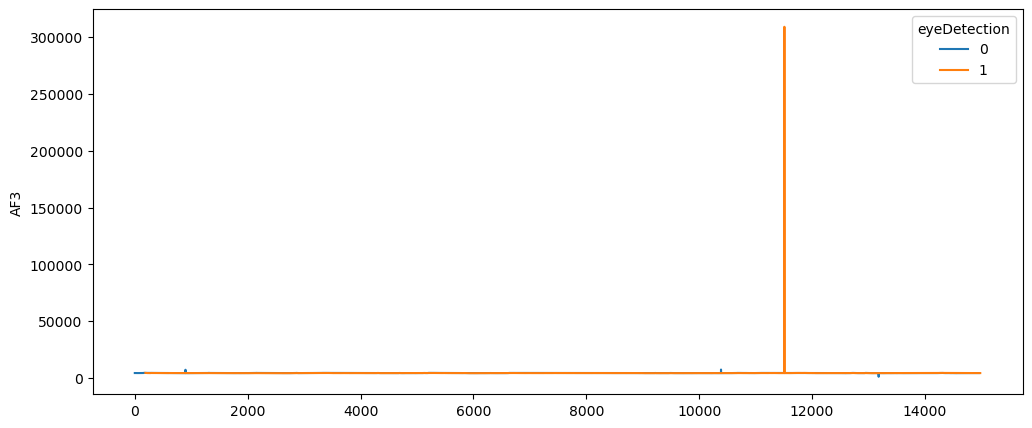

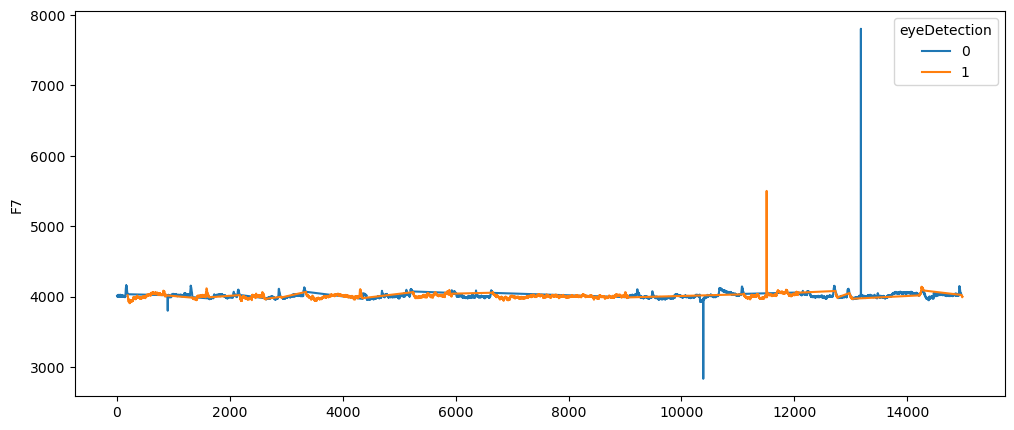

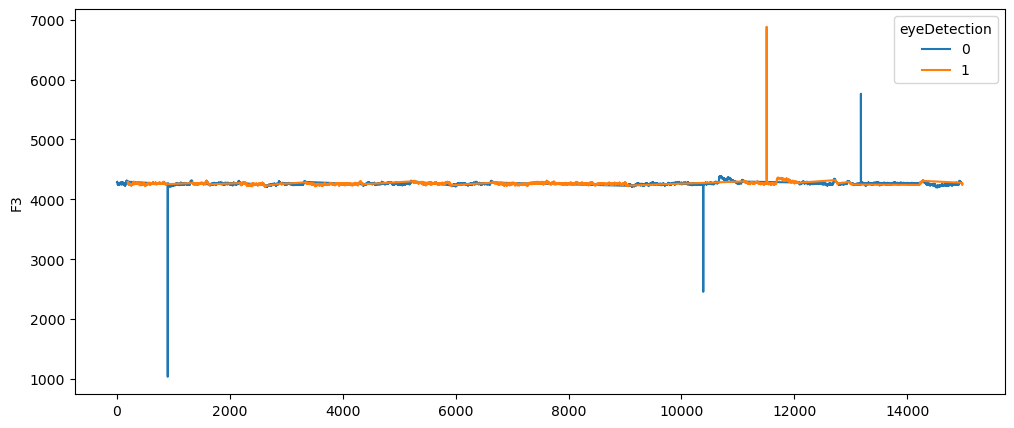

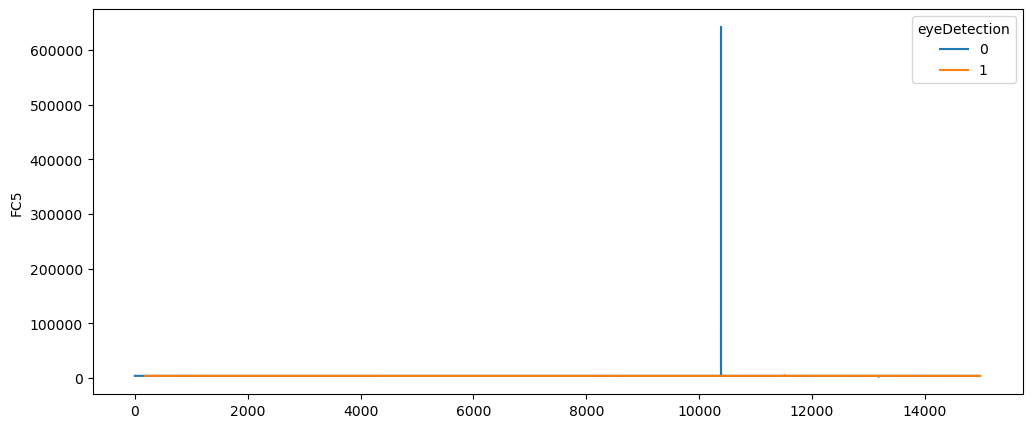

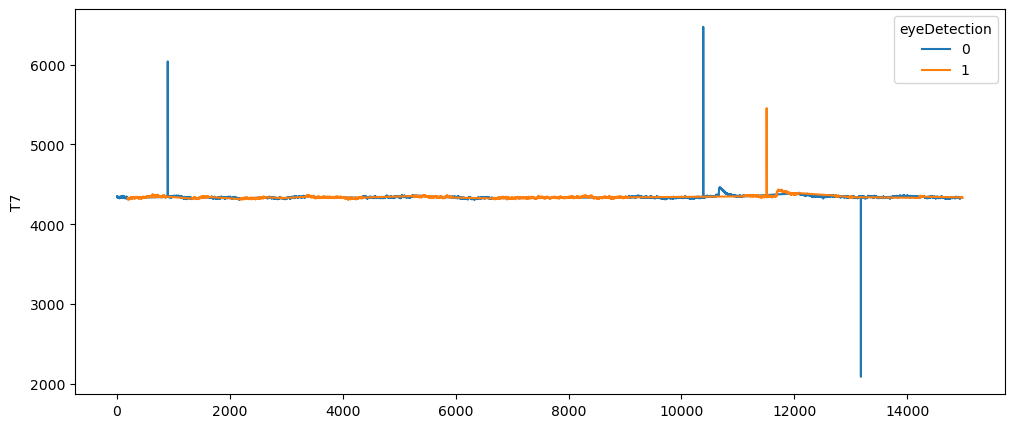

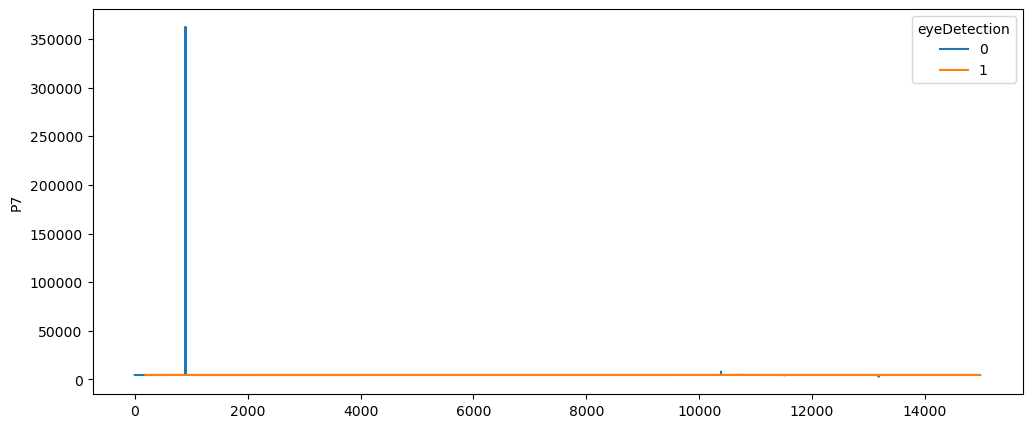

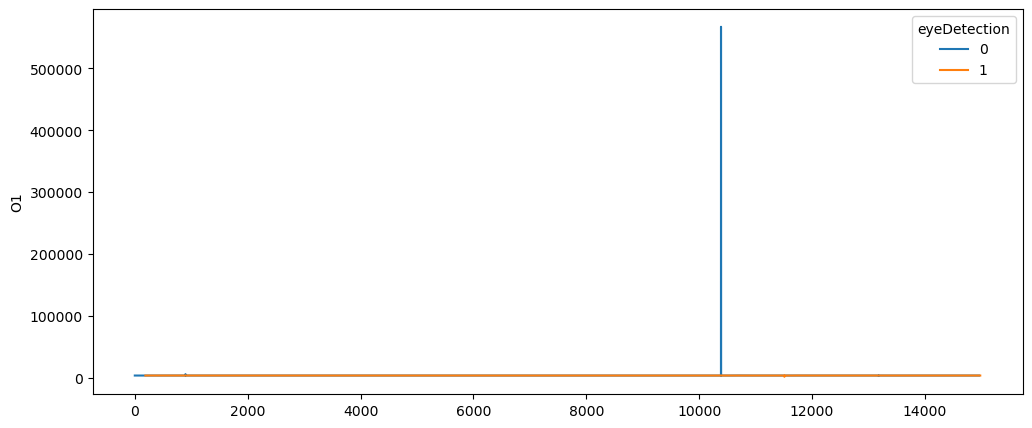

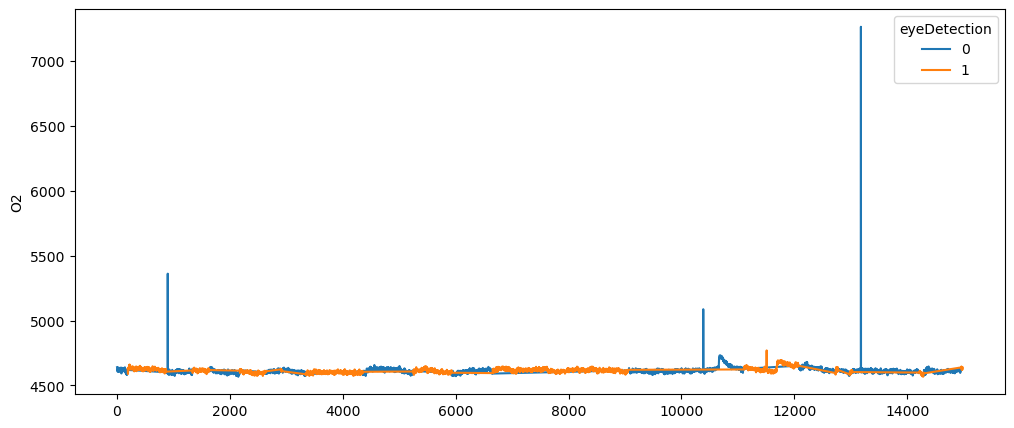

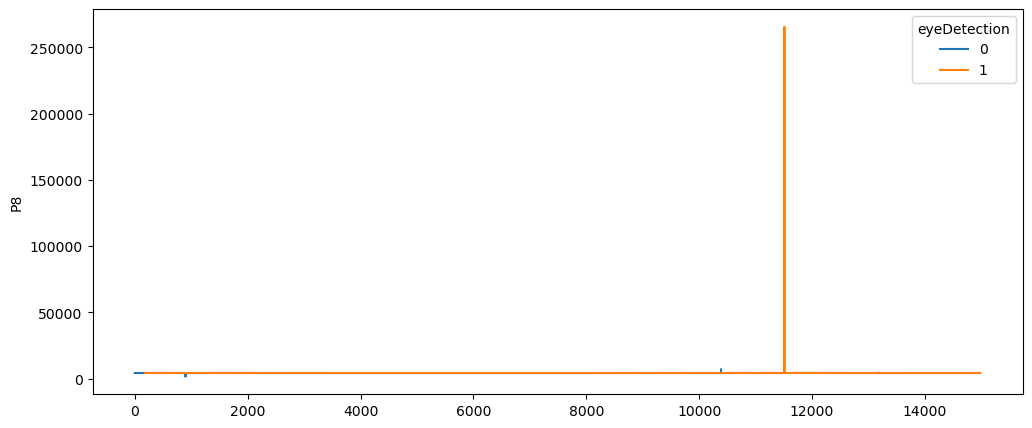

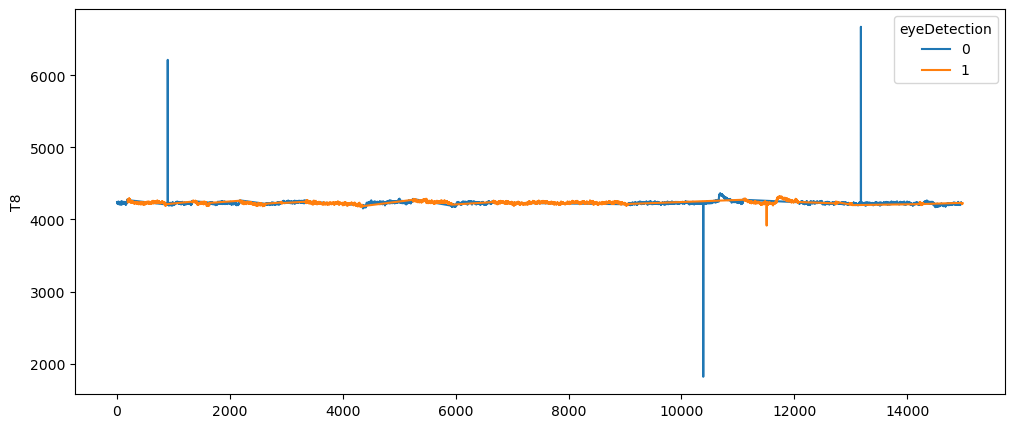

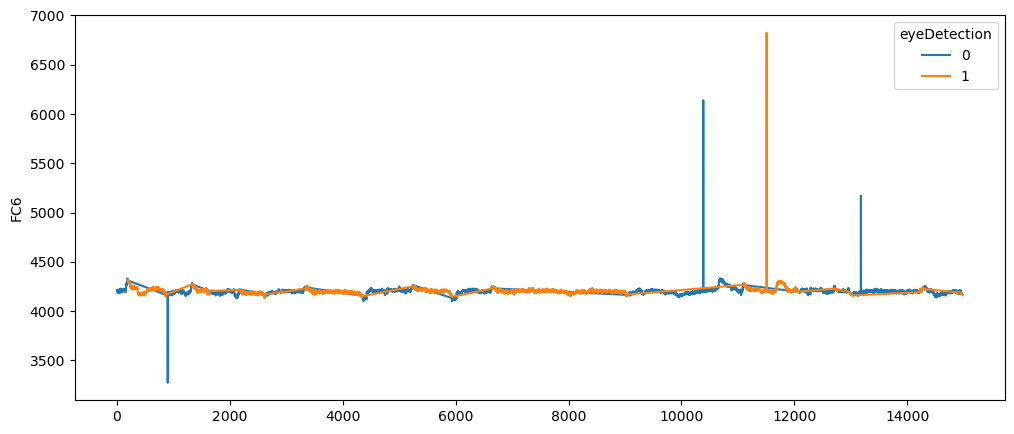

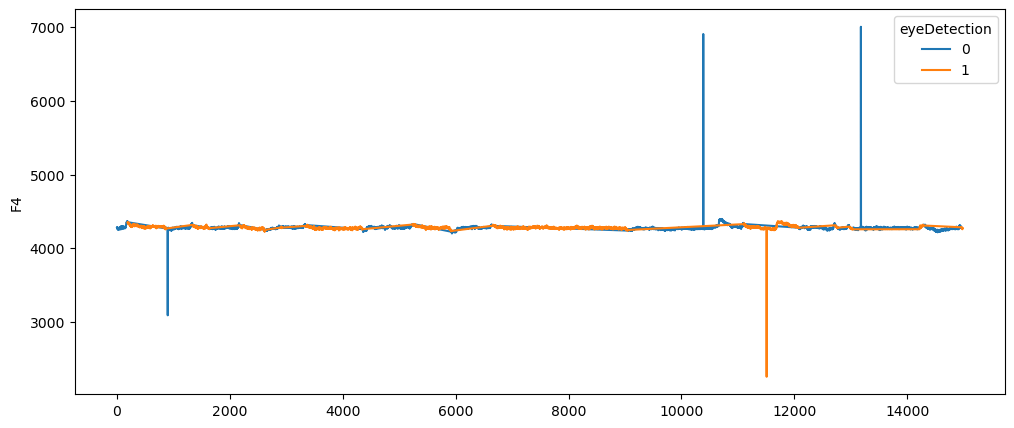

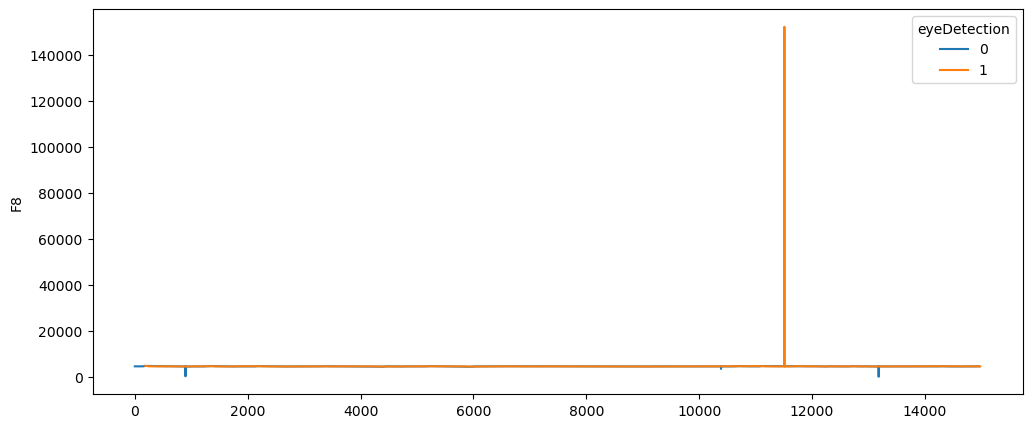

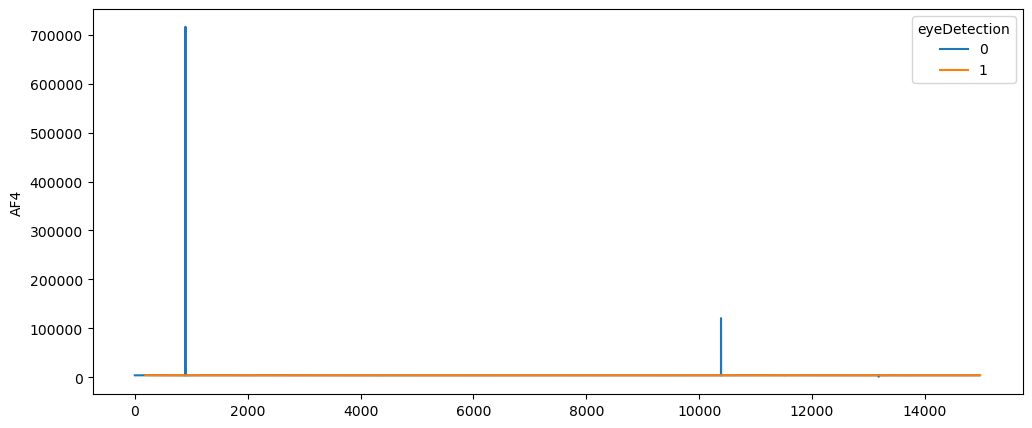

In [13]:
# Ploting line plots for each column in the original DataFrame
for col in df.columns[0:-1]:
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=df.index, y=col, data=df, hue="eyeDetection")
    plt.show()

In [14]:
# Calculating z-scores and filtering outliers
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 10).all(axis=1)
df_filtered = df[filtered_entries].reset_index(drop=True)


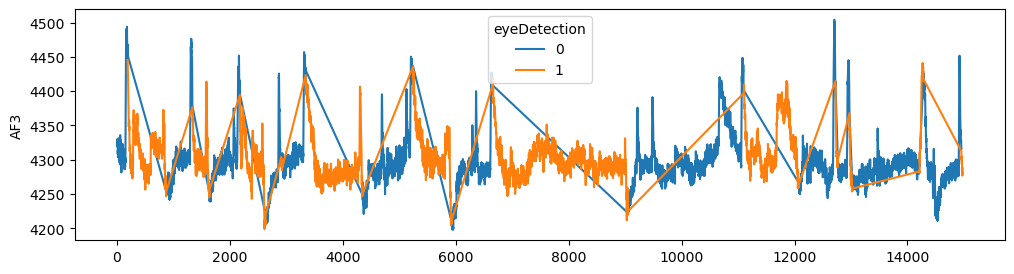

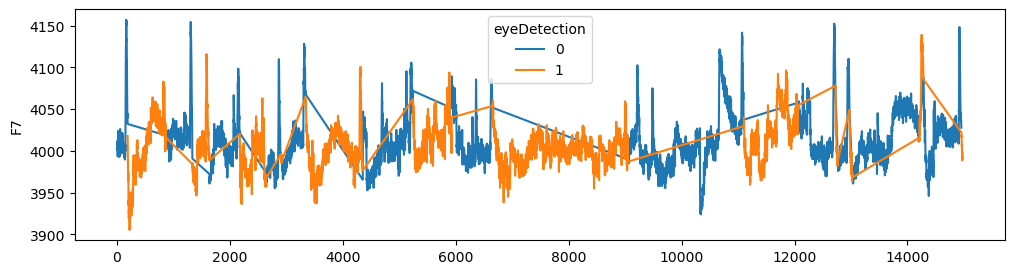

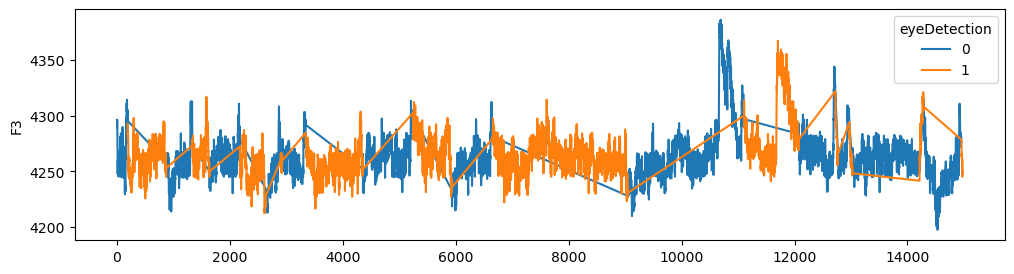

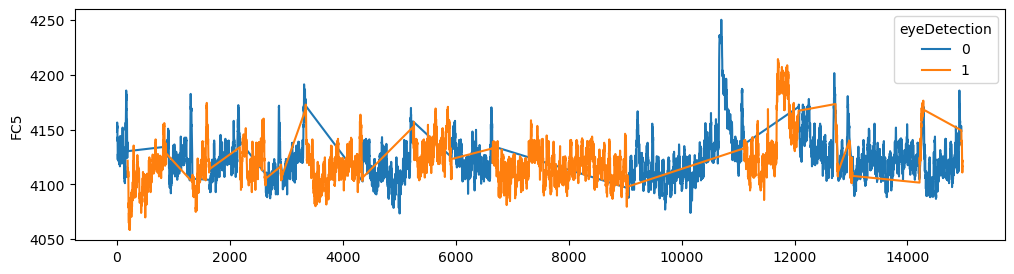

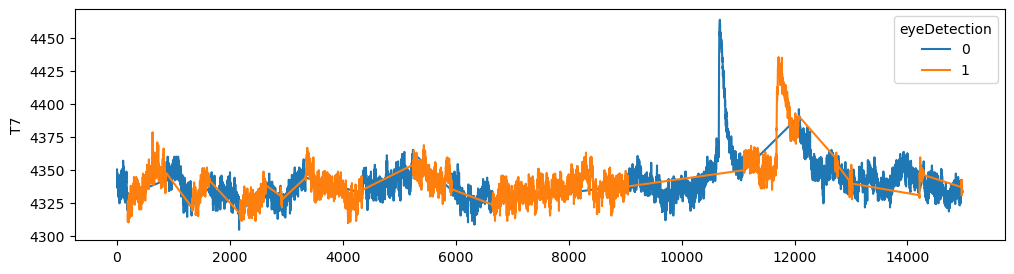

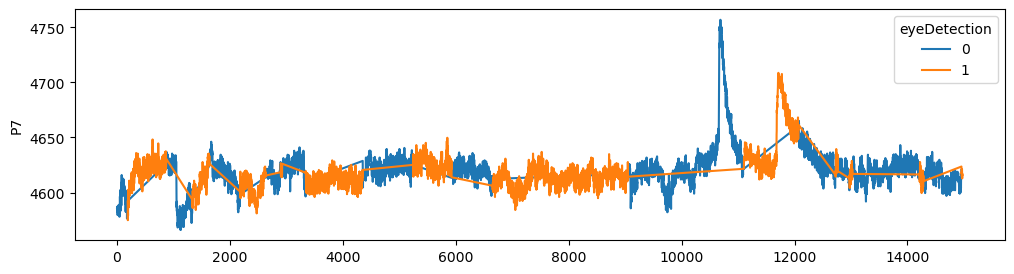

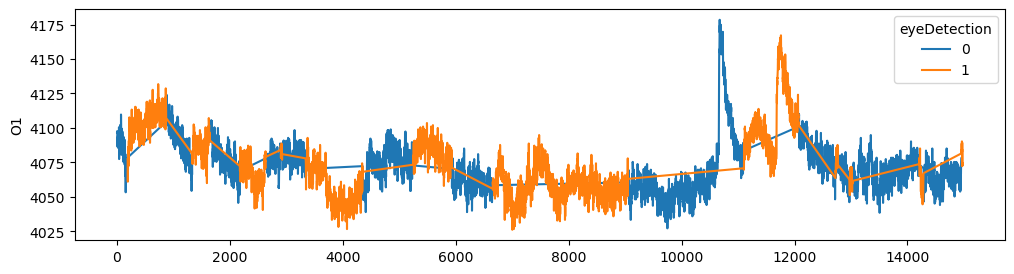

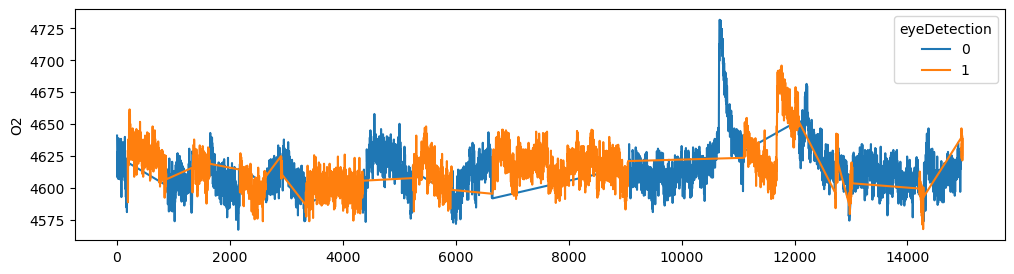

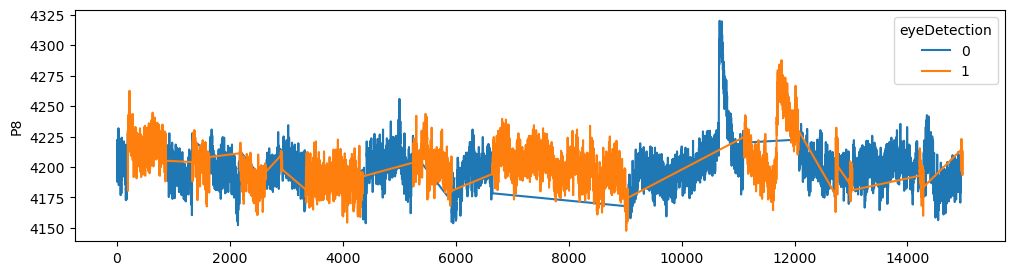

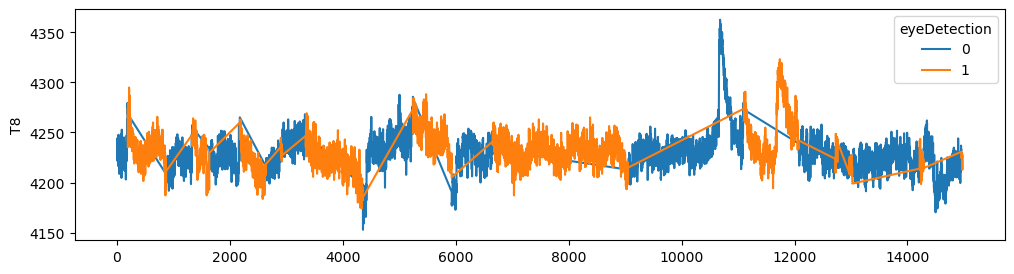

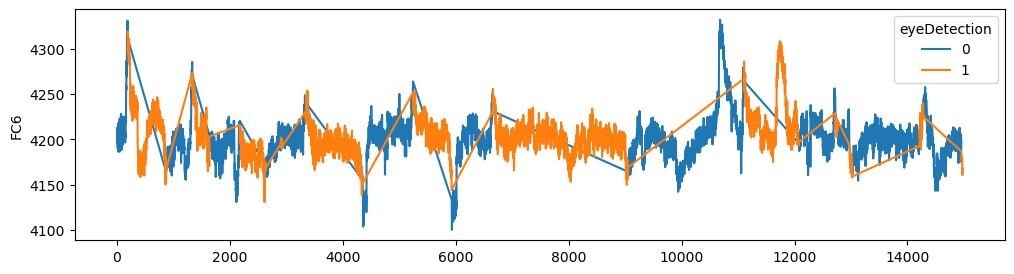

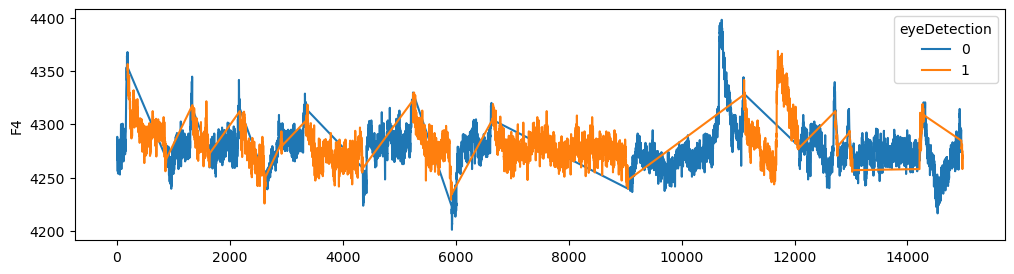

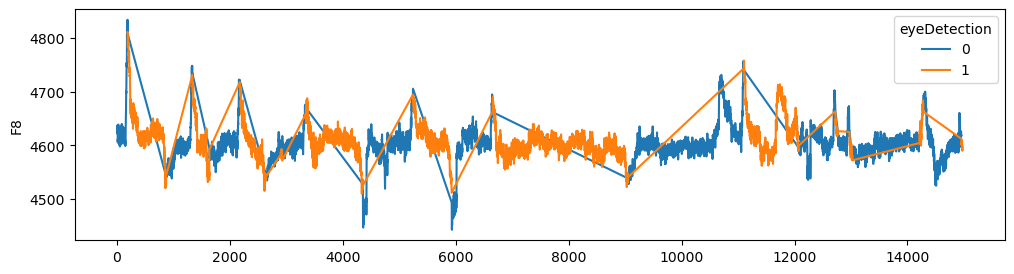

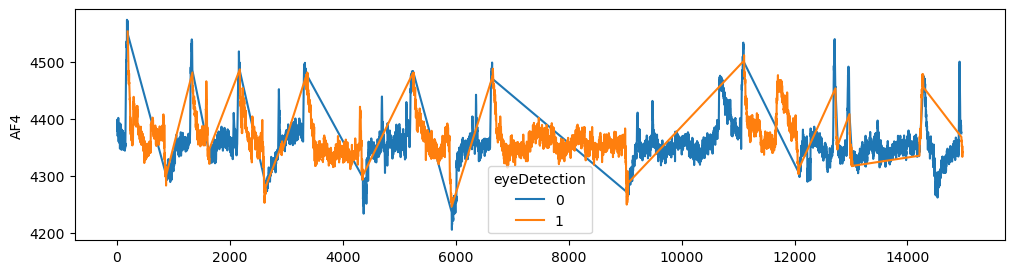

In [15]:
# Ploting line plots for each column in the filtered DataFrame
for col in df_filtered.columns[:-1]:
    plt.figure(figsize=(12, 3))
    sns.lineplot(x=df_filtered.index, y=col, data=df_filtered, hue="eyeDetection")
    plt.show()

In [16]:
# Perform feature selection using Recursive Feature Elimination (RFE)
X = df.drop(columns='eyeDetection')
Y = df['eyeDetection']

In [17]:
X = stats.zscore(X, axis=0)
X[np.abs(X) > 4] = np.nan
X = stats.zscore(X, axis=0, nan_policy='omit')
X[np.abs(X) > 4] = np.nan

from sklearn.impute import SimpleImputer

# Instantiating SimpleImputer with desired strategy 
imputer = SimpleImputer(strategy='mean')

# Applying imputation to the dataset
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [18]:
np.any(np.isnan(X))

False

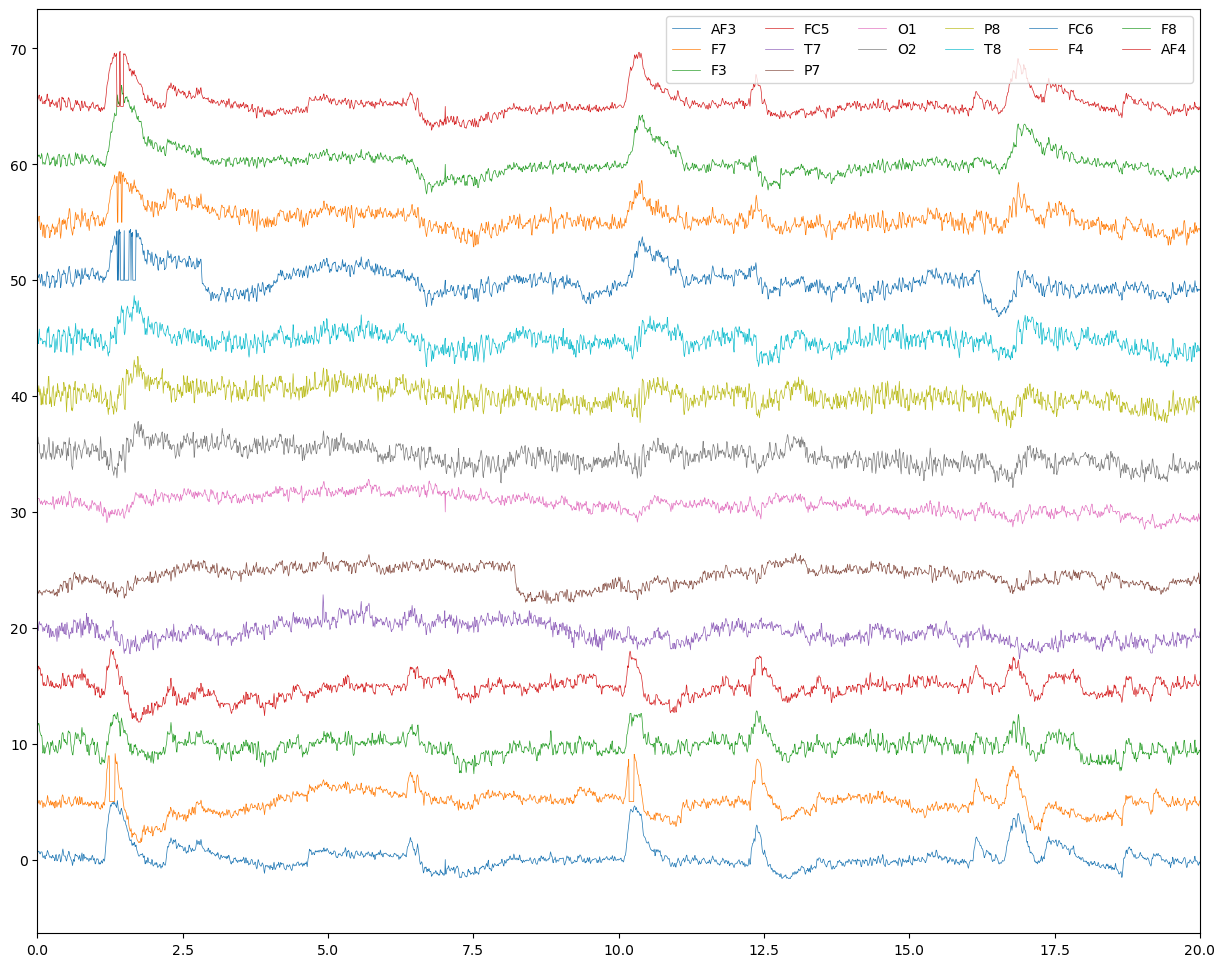

In [19]:
eeg_data_chart([X])

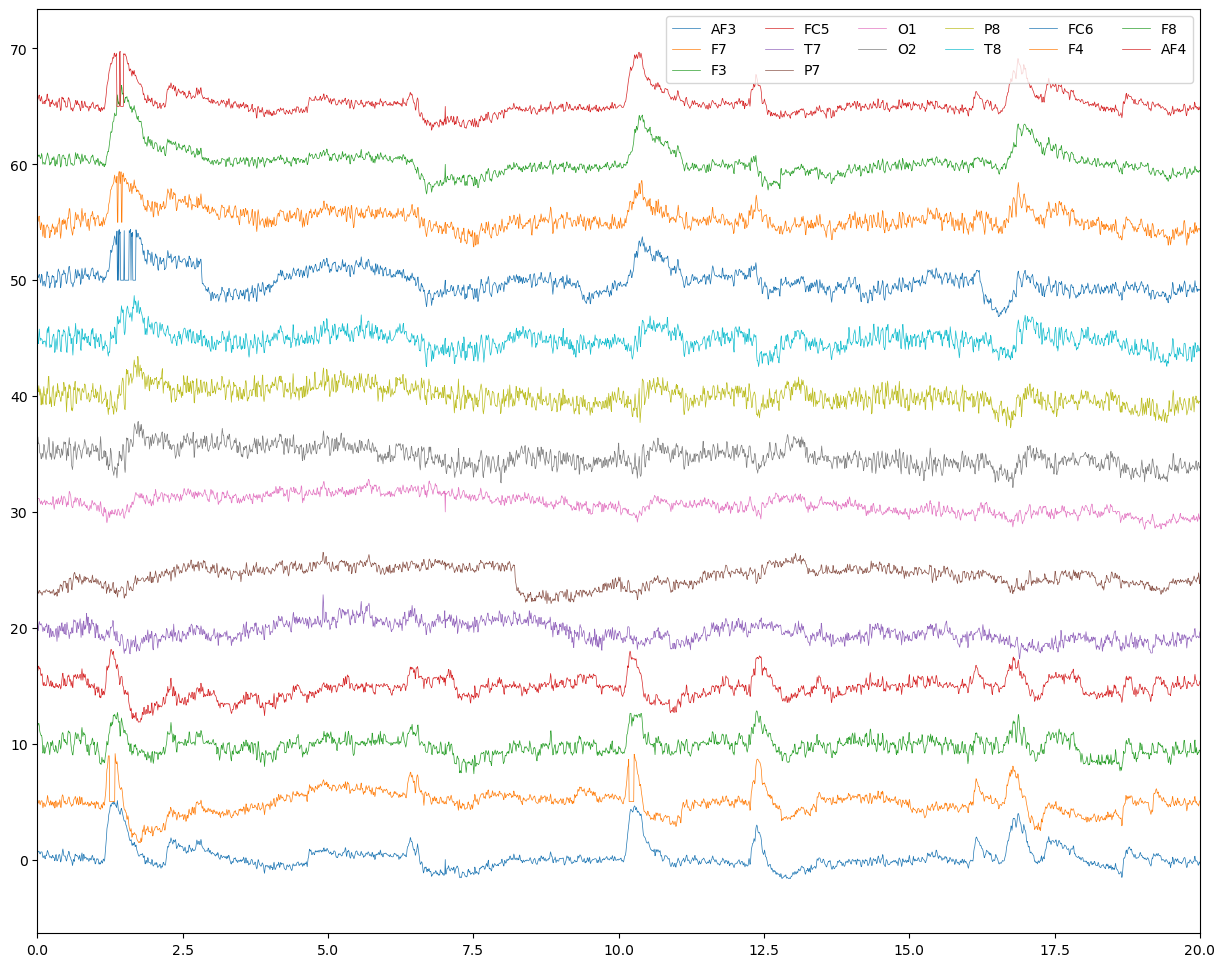

In [20]:
def process_interpolate(x):
    t_temp = t[ x.index[ ~x.isnull() ] ]
    x = x[ x.index[ ~x.isnull() ] ]
    clf = interpolate.interp1d(t_temp, x, kind='cubic')
    return clf(t)

X_interpolate = X.apply(process_interpolate, axis=0)
eeg_data_chart([X_interpolate])

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.



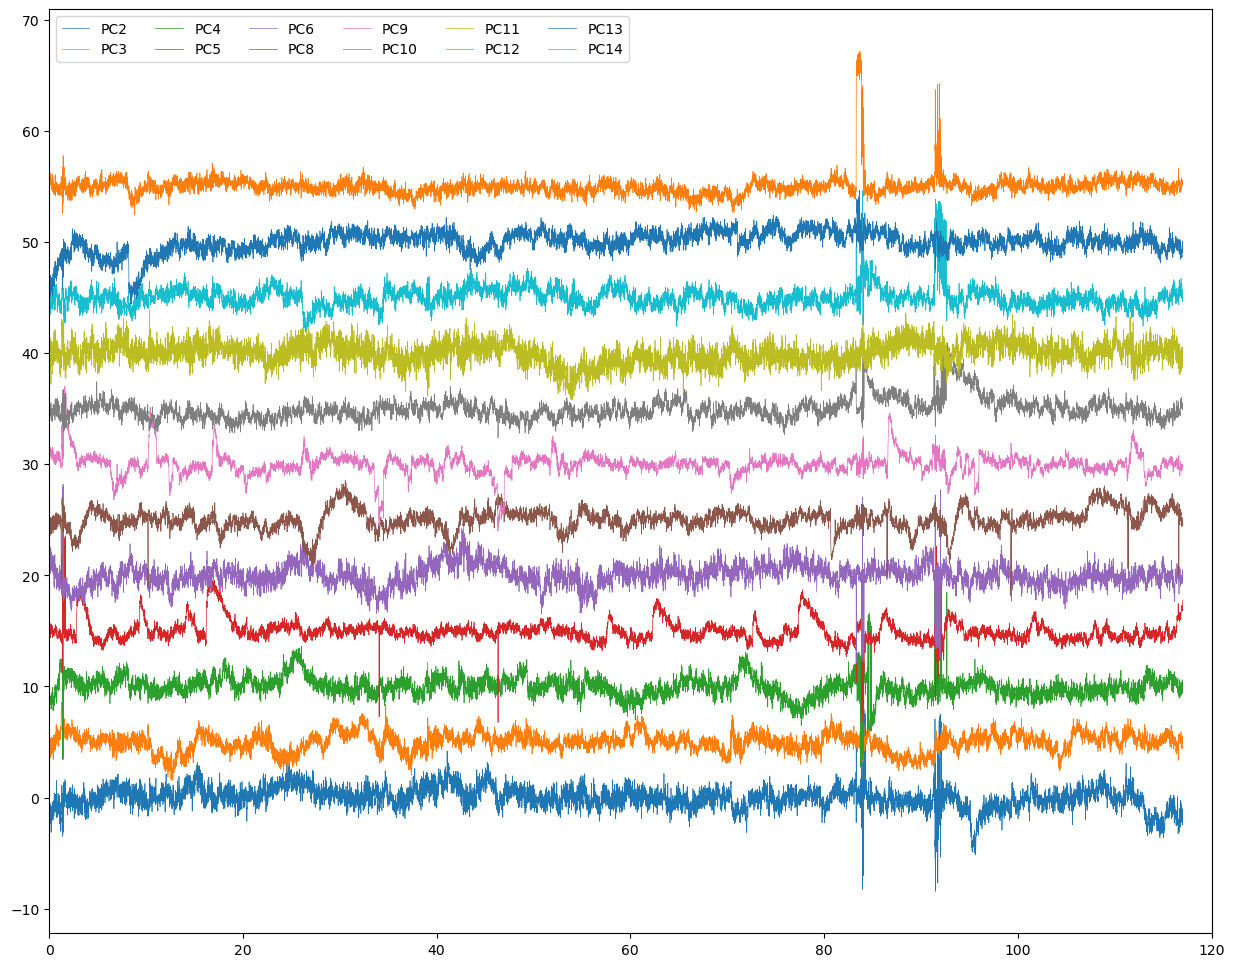

In [21]:
ica = FastICA(max_iter=2000, random_state=0)
X_pcs = pd.DataFrame( ica.fit_transform(X_interpolate) )
X_pcs.columns = ['PC' + str(ind+1) for ind in range(X_pcs.shape[-1])]
X_pcs = X_pcs.drop(columns=['PC1', 'PC7'])
eeg_data_chart([X_pcs], xlim=[0, 120])

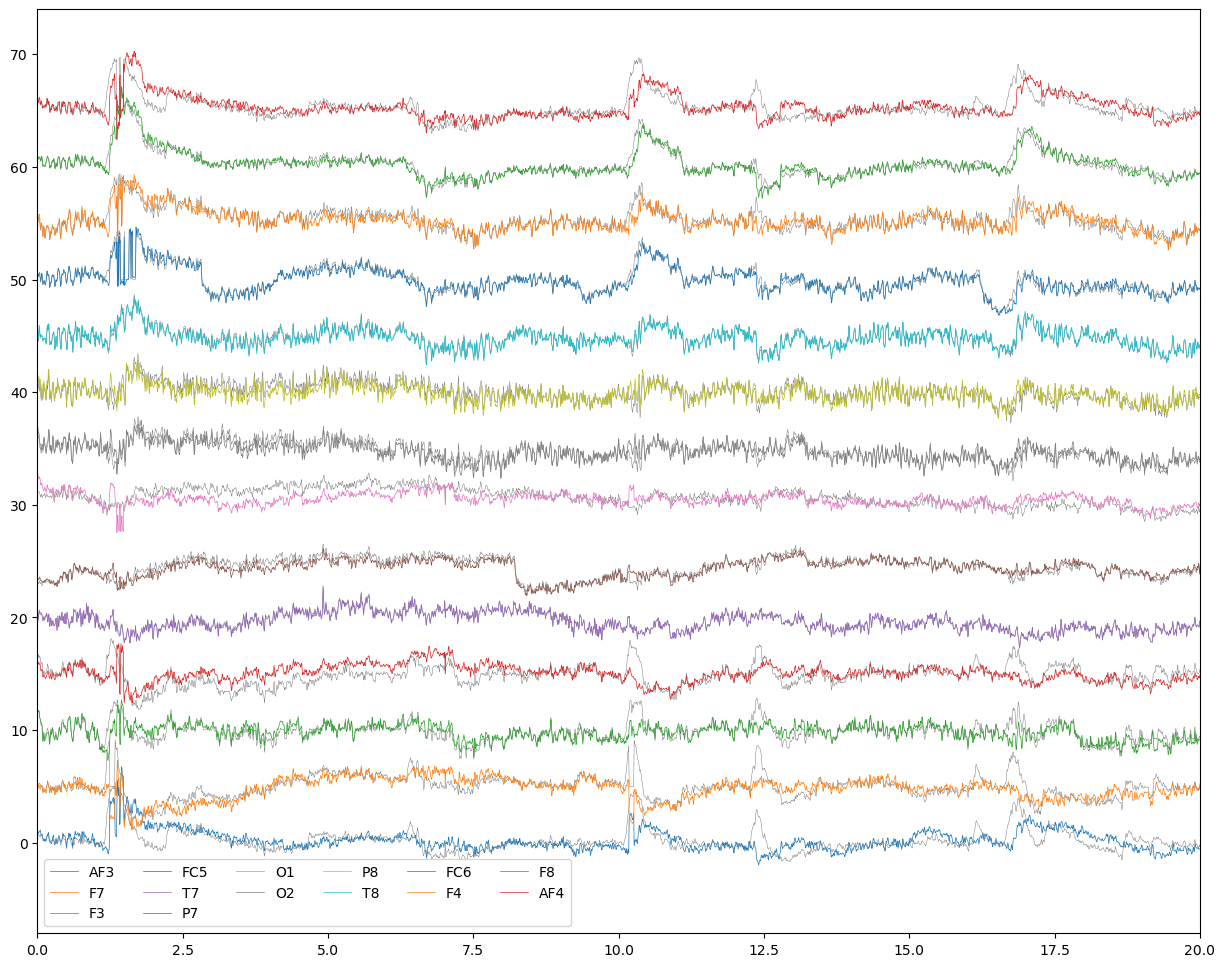

In [22]:
ica.mixing_ = np.delete(ica.mixing_, [0, 6], axis = 1)
X_interpolate_clean = pd.DataFrame( ica.inverse_transform(X_pcs) )
X_interpolate_clean.columns = ds_columns
eeg_data_chart([X_interpolate, X_interpolate_clean], xlim=[0, 20])

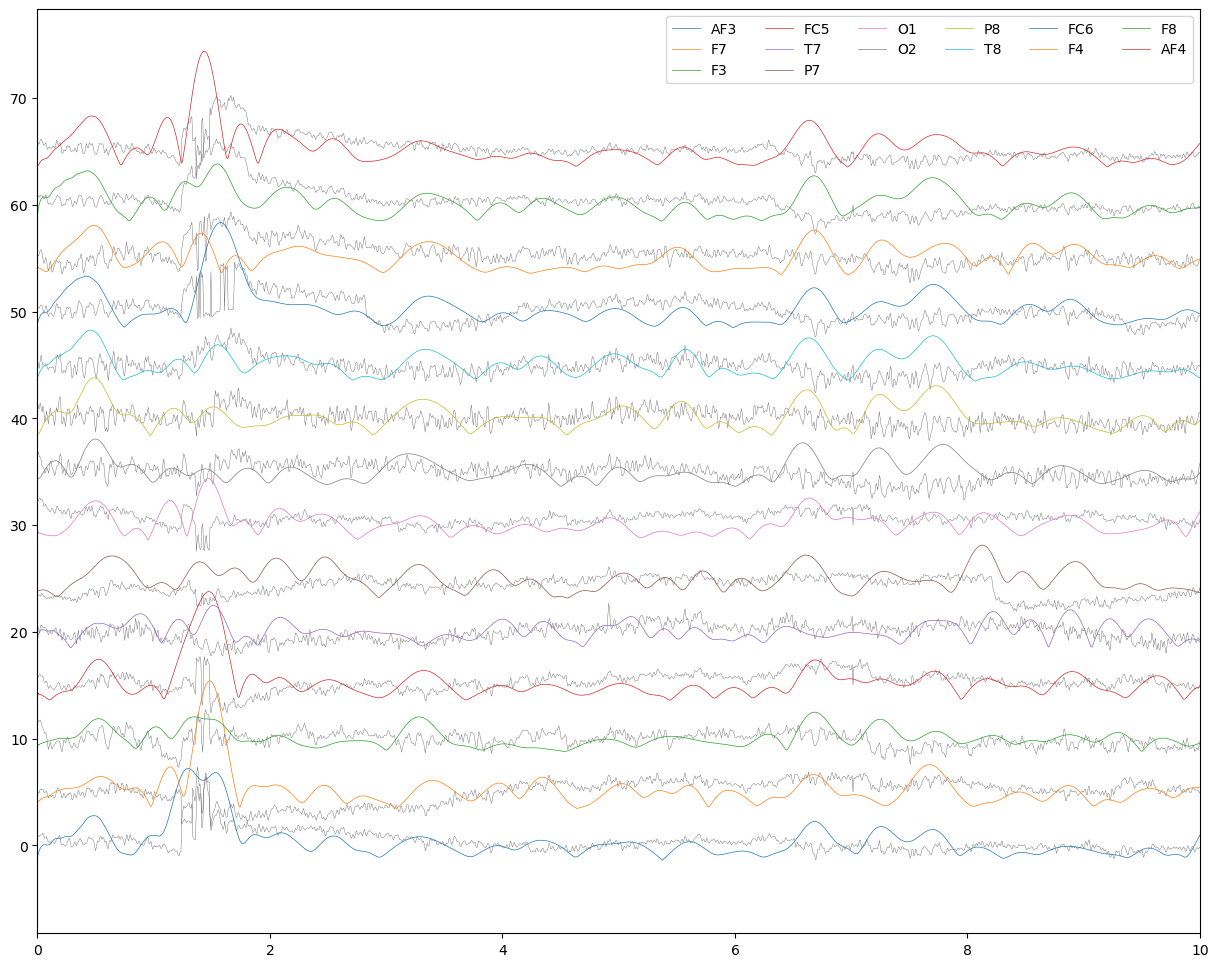

In [23]:
b, a = signal.butter(6, [8 / 128 * 2, 12 / 128 * 2], btype='bandpass')
X_interp_clean_alpha = X_interpolate_clean.apply(lambda x: signal.filtfilt(b, a, x) / max(abs(signal.filtfilt(b, a, x))) * max(abs(x)), axis=0)
X_interp_clean_alpha = X_interp_clean_alpha.apply(lambda x: np.abs(signal.hilbert(x)), axis=0)
X_interp_clean_alpha.columns = ds_columns
eeg_data_chart([X_interpolate_clean, X_interp_clean_alpha], xlim=[0, 10])

In [24]:
corr_matrix = df.corr().round(2)
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

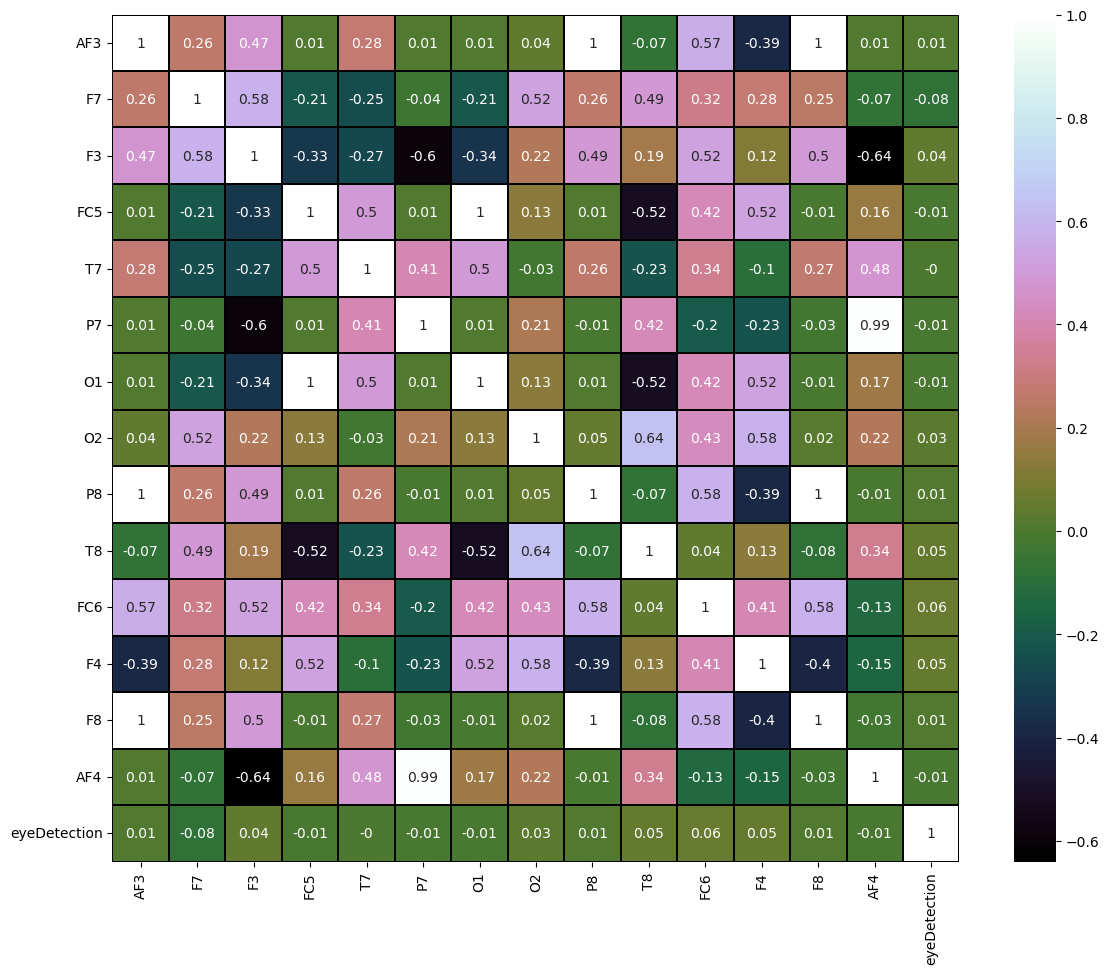

In [25]:
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center='light', as_cmap=True)
plt.figure(figsize=(14, 11))
sns.heatmap(corr_matrix,  linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)
plt.show()

In [26]:
np.any(np.isnan(X))

False

In [27]:
from sklearn import preprocessing
# Standardizing th features
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)


In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [29]:
from sklearn.feature_selection import RFECV


rf_clf = RandomForestClassifier(random_state=0)
rfecv = RFECV(estimator=rf_clf, step=1, cv=5)
X_train_selected = rfecv.fit_transform(X_train, y_train)

In [30]:
#selected feature indices
selected_feature_indices = rfecv.get_support(indices=True)

In [31]:
# Filtering the original DataFrame to include only the selected features
X_selected = X[:, selected_feature_indices]

#selected feature names
selected_features = df.columns[selected_feature_indices]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'T8', 'FC6', 'F4',
       'F8', 'AF4'],
      dtype='object')


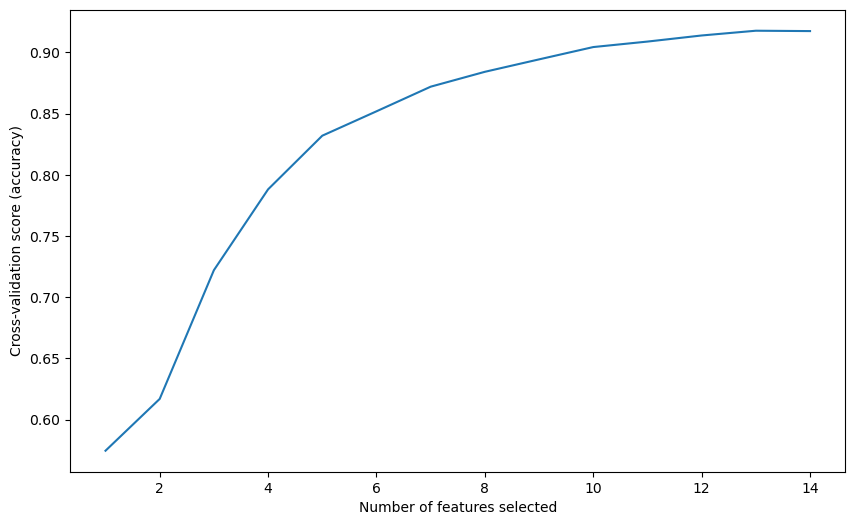

In [32]:
#RFECV results
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()

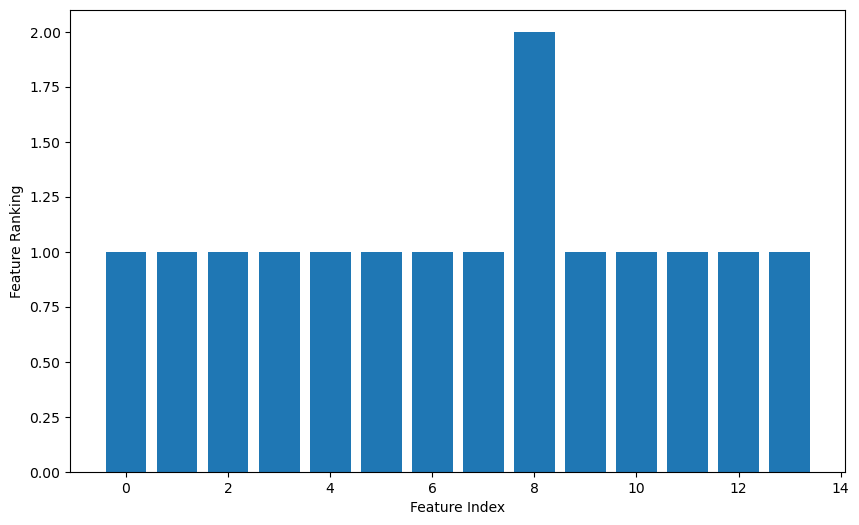

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(rfecv.ranking_)), rfecv.ranking_)
plt.xlabel("Feature Index")
plt.ylabel("Feature Ranking")
plt.show()



In [34]:
rf_clf_selected = RandomForestClassifier(random_state=0)
rf_clf_selected.fit(X_train_selected, y_train)
X_test_selected = X_test[:, selected_feature_indices]
y_pred = rf_clf_selected.predict(X_test_selected)
rf_clf_acc = accuracy_score(y_test, y_pred) * 100
cm_rf = confusion_matrix(y_test, y_pred)

In [35]:

print(classification_report(y_test, y_pred))
print("Accuracy: {:.2f}%".format(rf_clf_acc))
print("Confusion Matrix:")
print(cm_rf)



              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2642
           1       0.95      0.89      0.92      2302

    accuracy                           0.93      4944
   macro avg       0.93      0.92      0.93      4944
weighted avg       0.93      0.93      0.93      4944

Accuracy: 92.64%
Confusion Matrix:
[[2529  113]
 [ 251 2051]]


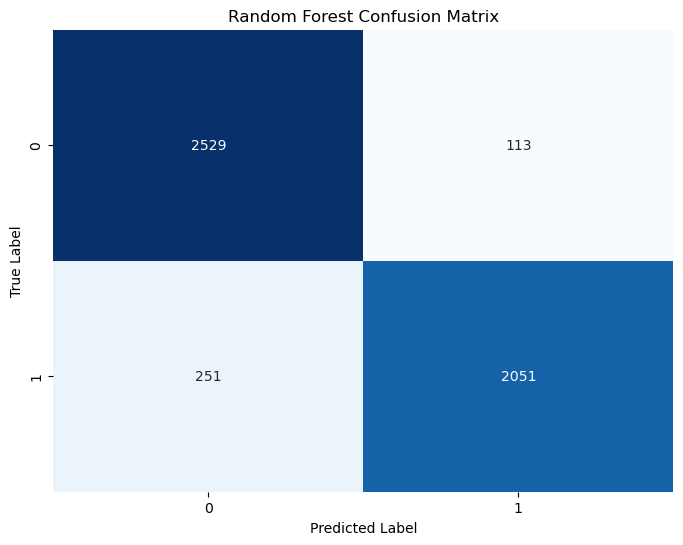

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

#parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}


In [38]:
rf_clf = RandomForestClassifier(random_state=0)

#hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [39]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [40]:
best_rf_clf = RandomForestClassifier(random_state=0, **best_params)
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [41]:
y_pred = best_rf_clf.predict(X_test)

In [42]:
accuracygs = accuracy_score(y_test, y_pred)* 100
confusion_matgs = confusion_matrix(y_test, y_pred)

In [43]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy: {:.2f}%".format(accuracygs))




Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.920587257348285
Accuracy: 92.84%


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2642
           1       0.95      0.89      0.92      2302

    accuracy                           0.93      4944
   macro avg       0.93      0.93      0.93      4944
weighted avg       0.93      0.93      0.93      4944



<Axes: title={'center': 'GridSearchCV Confusion Matrix'}>

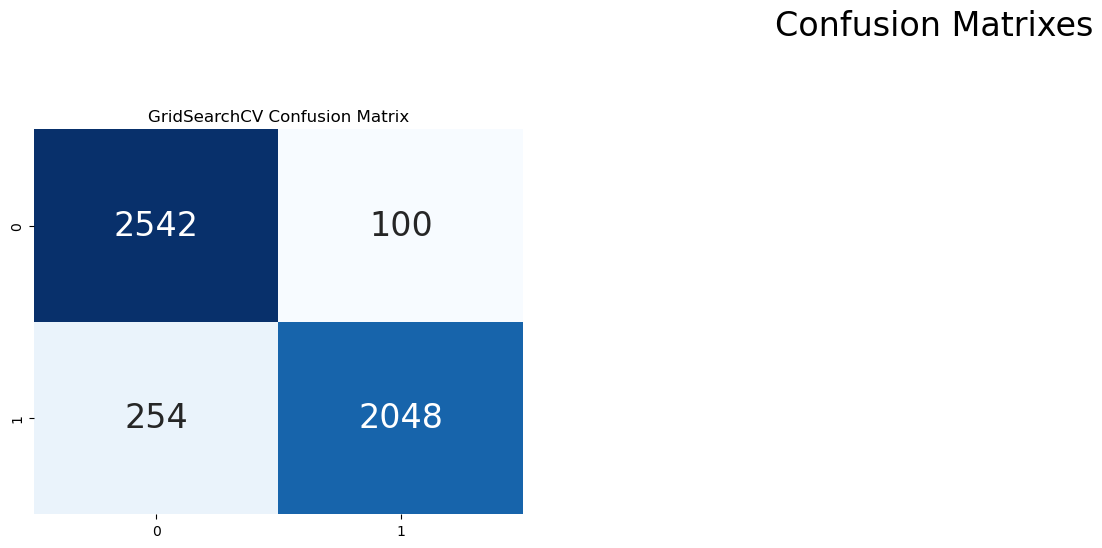

In [45]:
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(2,3,1)
plt.title("GridSearchCV Confusion Matrix")
sns.heatmap(confusion_matgs,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [46]:
from skopt import BayesSearchCV

In [47]:
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (1, 20),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
    'max_features': (0.1, 1.0, 'uniform')
}

In [48]:
rf_clf = RandomForestClassifier(random_state=0)

In [49]:
bayes_search = BayesSearchCV(
    estimator=rf_clf,
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    random_state=0
)
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
              random_state=0,
              search_spaces={'max_depth': (1, 20),
                             'max_features': (0.1, 1.0, 'uniform'),
                             'min_samples_leaf': (1, 5),
                             'min_samples_split': (2, 10),
                             'n_estimators': (100, 500)})

In [50]:
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_


In [51]:
best_rf_clf = RandomForestClassifier(random_state=0, **best_params)
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=0.40688131153665463,
                       n_estimators=500, random_state=0)

In [52]:
y_pred = best_rf_clf.predict(X_test)

In [53]:
accuracybs = accuracy_score(y_test, y_pred)* 100
confusion_matbay = confusion_matrix(y_test, y_pred)

# best parameters, best score, accuracy, and confusion matrix
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy: {:.2f}%".format(accuracybs))



Best Parameters: OrderedDict([('max_depth', 20), ('max_features', 0.40688131153665463), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])
Best Score: 0.9200888027362399
Accuracy: 92.54%


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2642
           1       0.95      0.89      0.92      2302

    accuracy                           0.93      4944
   macro avg       0.93      0.92      0.92      4944
weighted avg       0.93      0.93      0.93      4944



<Axes: title={'center': 'BayessearchCV Confusion Matrix'}>

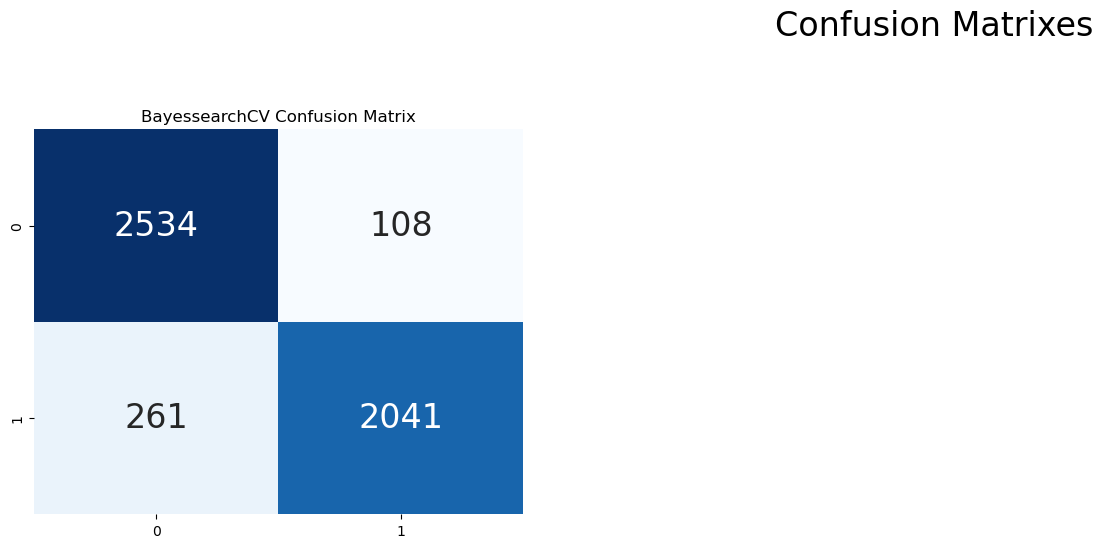

In [55]:
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(2,3,1)
plt.title("BayessearchCV Confusion Matrix")
sns.heatmap(confusion_matbay,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})